In [1]:
%cd ..

%load_ext autoreload
%autoreload 2

/scratch3/zha439/REPA


In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [8]:
base_path = "evals_3"

exps = [
    "sit-xl-base-50k",
    "sit-xl-linear-dinov2-b-enc8-50k",
    # "sit-xl-linear-dinov2-b-enc8-patch2patch-0.2-0.2-coeff0.2-50k",
    # "sit-xl-linear-dinov2-b-enc8-patch2patch-jsd-0.2-0.2-coeff0.2-50k",
    "sit-xl-linear-dinov2-b-enc8-sample2sample-0.2-0.2-coeff0.2-50k",
    "sit-xl-linear-dinov2-b-enc8-sample2sample-jsd-0.2-0.2-coeff0.2-50k",
    # "sit-xl-linear-dinov2-b-enc8-patch2patch-0.2-0.2-only-coeff0.2-50k",
    # "sit-xl-linear-dinov2-b-enc8-patch2patch-jsd-0.2-0.2-only-coeff0.2-50k",
    "sit-xl-linear-dinov2-b-enc8-sample2sample-0.2-0.2-only-coeff0.2-50k",
    "sit-xl-linear-dinov2-b-enc8-sample2sample-jsd-0.2-0.2-only-coeff0.2-50k",
]

attrs = ["Inception Score", "FID", "sFID"]

def get_stats(attr):
    exps_steps = {}
    for f in sorted(os.listdir(base_path)):
        if not f.endswith(".csv"):
            continue
        csv_path = os.path.join(base_path, f)
        for exp in exps:
            if f.startswith(exp):
                steps = f.split("_")[1].split(".")[0]
                df = pd.read_csv(csv_path)
                if exp not in exps_steps:
                    exps_steps[exp] = {}
                exps_steps[exp][steps] = df[attr].values.item()
                break
    return exps_steps

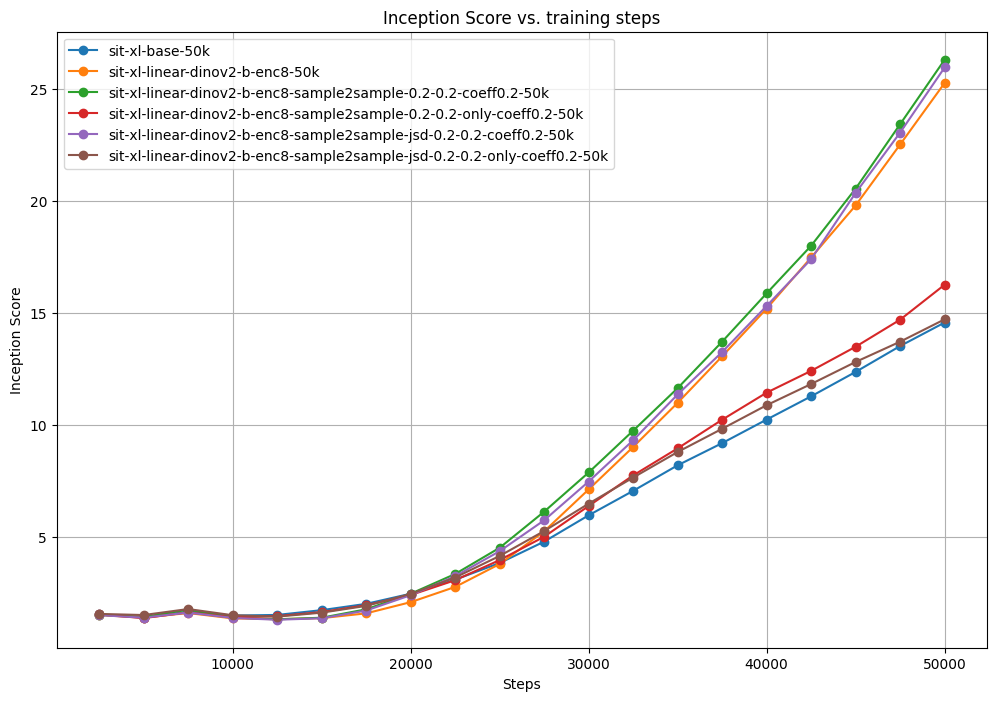

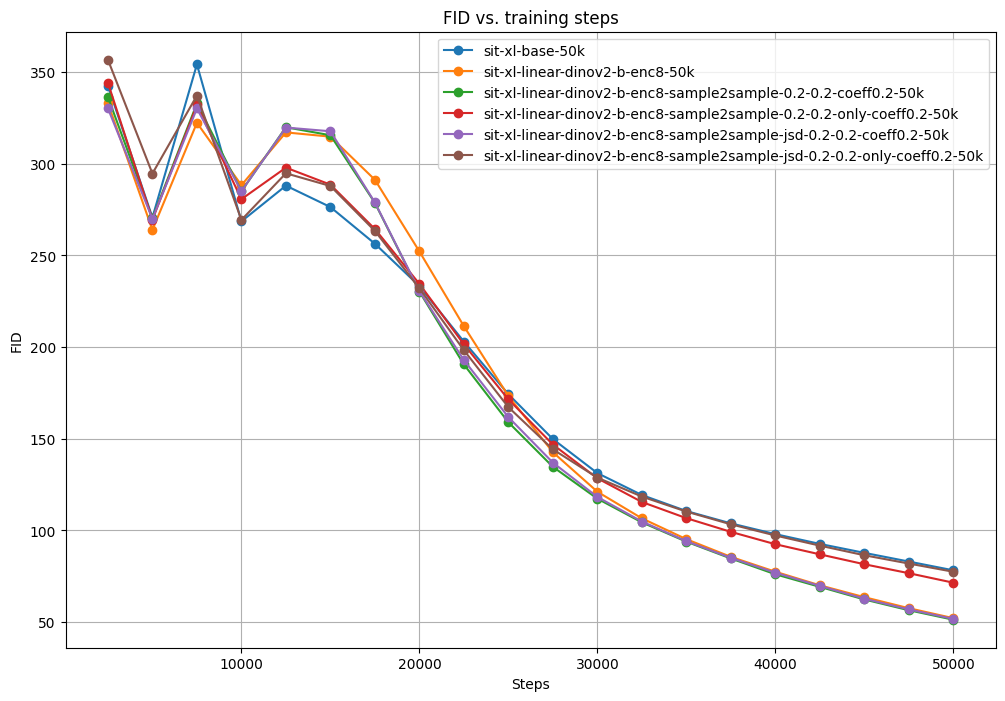

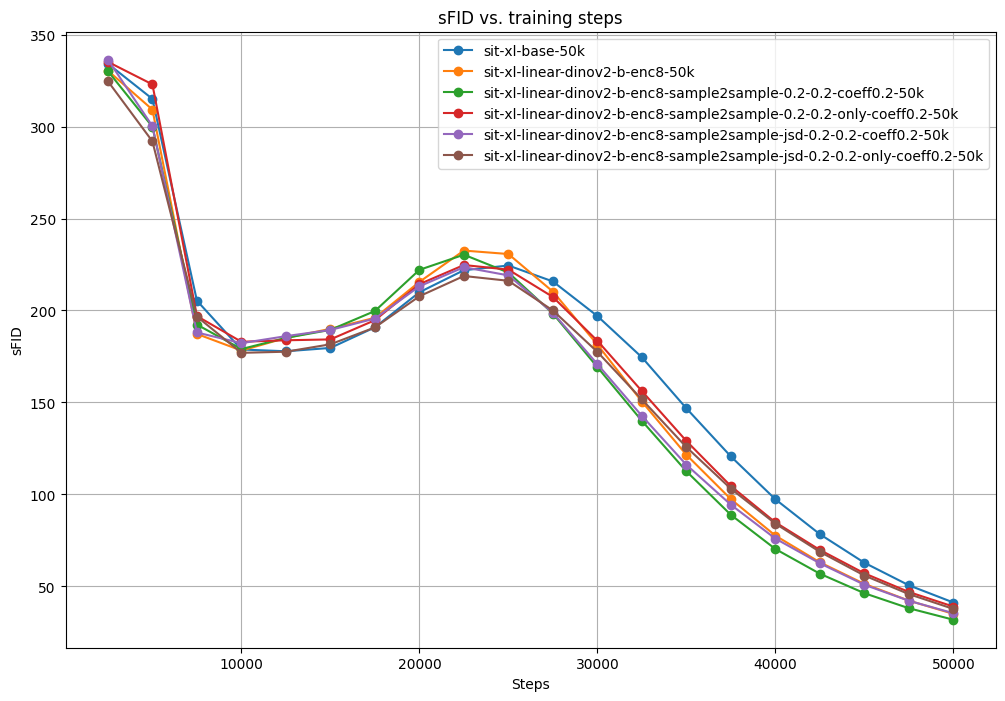

In [9]:
for attr in attrs:
    exps_steps = get_stats(attr)
    plt.figure(figsize=(12, 8))
    for exp, inner_dict in exps_steps.items():
        plt.plot([int(elem) for elem in inner_dict.keys()], inner_dict.values(), marker="o", label=exp)
    plt.xlabel("Steps")
    plt.ylabel(attr)
    plt.title(f"{attr} vs. training steps")
    plt.grid()
    plt.legend()
    plt.show()

In [11]:
get_stats("FID")

{'sit-xl-base-50k': {'0002500': 342.4927123235879,
  '0005000': 270.6492783369412,
  '0007500': 354.16596250872124,
  '0010000': 268.545956717962,
  '0012500': 288.03580393291736,
  '0015000': 276.36045031796425,
  '0017500': 256.3626598986524,
  '0020000': 233.23601107664643,
  '0022500': 202.97010540488972,
  '0025000': 174.26767520187977,
  '0027500': 149.8210063134183,
  '0030000': 131.26409672261389,
  '0032500': 119.31282228195944,
  '0035000': 110.56752937553506,
  '0037500': 103.8500682106557,
  '0040000': 97.98180704838931,
  '0042500': 92.64756937027296,
  '0045000': 87.77076954274344,
  '0047500': 83.02717270774491,
  '0050000': 78.25311234132016},
 'sit-xl-linear-dinov2-b-enc8-50k': {'0002500': 333.0083313089476,
  '0005000': 263.88292788798844,
  '0007500': 322.3075940960373,
  '0010000': 288.27876962755903,
  '0012500': 317.0777074878948,
  '0015000': 314.75260062075233,
  '0017500': 291.2482948825344,
  '0020000': 252.15105414092147,
  '0022500': 211.37619038087843,
  '0